# Question 1

# Importing and Preprocessing

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from wordcloud import WordCloud

import preprocess

In [2]:
filename = './hillary-clinton-emails/Emails.csv'
df_emails = pd.read_csv(filename)
print(df_emails.columns)
df_emails.head(2)

Index(['Id', 'DocNumber', 'MetadataSubject', 'MetadataTo', 'MetadataFrom',
       'SenderPersonId', 'MetadataDateSent', 'MetadataDateReleased',
       'MetadataPdfLink', 'MetadataCaseNumber', 'MetadataDocumentClass',
       'ExtractedSubject', 'ExtractedTo', 'ExtractedFrom', 'ExtractedCc',
       'ExtractedDateSent', 'ExtractedCaseNumber', 'ExtractedDocNumber',
       'ExtractedDateReleased', 'ExtractedReleaseInPartOrFull',
       'ExtractedBodyText', 'RawText'],
      dtype='object')


,Id,DocNumber,MetadataSubject,MetadataTo,MetadataFrom,SenderPersonId,MetadataDateSent,MetadataDateReleased,MetadataPdfLink,MetadataCaseNumber,...,ExtractedTo,ExtractedFrom,ExtractedCc,ExtractedDateSent,ExtractedCaseNumber,ExtractedDocNumber,ExtractedDateReleased,ExtractedReleaseInPartOrFull,ExtractedBodyText,RawText
0,1,C05739545,WOW,H,"Sullivan, Jacob J",87.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739545...,F-2015-04841,...,NaN,"Sullivan, Jacob J <Sullivan11@state.gov>",NaN,"Wednesday, September 12, 2012 10:16 AM",F-2015-04841,C05739545,05/13/2015,RELEASE IN FULL,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
1,2,C05739546,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,H,NaN,NaN,2011-03-03T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739546...,F-2015-04841,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739546,05/13/2015,RELEASE IN PART,"B6\nThursday, March 3, 2011 9:45 PM\nH: Latest...",UNCLASSIFIED\nU.S. Department of State\nCase N...


In the three questions we use our external python script preprocess.py that contains two functions:
- `rawEmailCleaner` removes from the field `RawText` the non meaningful lines 
- `nlpPipeLine` performs tokenization, removal of stop words and lemmatization

Using these two methods, we build two corpus for the word clouds

In [3]:
df_emails['CleanRawText'] = df_emails.apply(lambda row: preprocess.rawEmailCleaner(row.RawText), axis=1)
df_emails['ProcessedText'] = df_emails.apply(lambda row: preprocess.nlpPipeLine(row.CleanRawText), axis=1)
df_emails[['ProcessedText', 'CleanRawText', 'RawText']].head()

,ProcessedText,CleanRawText,RawText
0,"[wonderful, strong, moving, statement, bos, pl...","what a wonderful, strong and moving statement ...",UNCLASSIFIED\nU.S. Department of State\nCase N...
1,"[thursday, march, latest, syria, aiding, qadda...","thursday, march latest how syria is aiding qad...",UNCLASSIFIED\nU.S. Department of State\nCase N...
2,"[thx, original, message, former, colleague, te...",thx original message to you and all my former ...,UNCLASSIFIED\nU.S. Department of State\nCase N...
3,"[mill, cheryl, subject, cairo, condemnation, f...","to mills, cheryl subject cairo condemnation fi...",UNCLASSIFIED\nU.S. Department of State\nCase N...
4,"[hrod17, clintonemail, com, friday, march, hum...","<hrod17@clintonemail.com> friday, march huma a...",B6\nUNCLASSIFIED\nU.S. Department of State\nCa...


# Generating word clouds

In [4]:
cleanRawText = ' '.join(df_emails.CleanRawText.tolist())
processedText = ' '.join([' '.join(words) for words in df_emails.ProcessedText.tolist()])

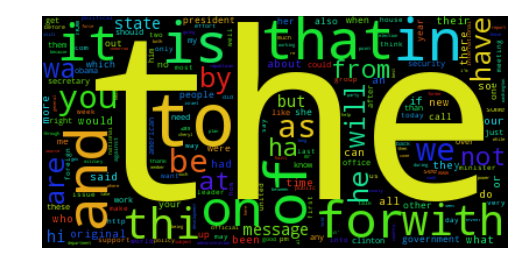

In [5]:
wordcloud = WordCloud(stopwords=[]).generate(cleanRawText)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

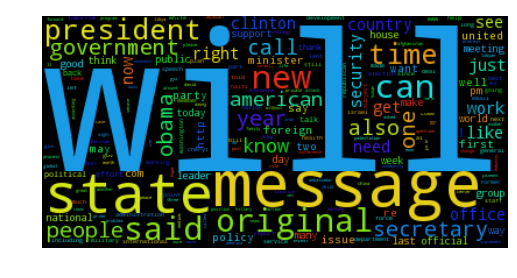

In [6]:
wordcloud = WordCloud(stopwords=[]).generate(processedText)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

As the wordcloud library performs automatically the removal of stop words, we give it as argument an empty stop words list in order to be able to see the effect of our nlp pipeline. It's incredible !! =D =D =D 